# Utils Functions and Tests

In [1]:
from binary_tools.binary.kicks import*
from binary_tools.binary.tests.test_kicks import*
from binary_tools.binary.orbits import*
from binary_tools.binary.tests.run_tests import*

## kicks

The kicks file contains a series of functions that randomly sample vaules to create both the kick magnitude and direction, and another seriers of functions that makes a preditions of the final system post kick. 

The first is rand_phi() which samples the spherical coordinate $\phi$ from 0 to 2$\pi$. The second is rand_theta() which samples the spherical coordinate $\theta$ from 0 to $\pi$. The last is rand_velocity($\sigma$) which accepts a value $\sigma$ and returns a random velocity sampled from a maxwellian distribution.

$\phi$ follows the distribution:

$$f(x) = 1$$

In [ ]:
phi = rand_phi()

$\theta$ follows the distribution:

$$f(x) = \frac{1}{2\sin(\theta)}$$

In [ ]:
theta = rand_theta()

the velocity follows the maxwellian distribution:

$$f(v) = \left(\frac{2}{\pi\sigma^2}\right)^{\left(\frac{-1}{2}\right)}e^{\frac{-v^2}{(2\sigma^2)}}$$

In [ ]:
velocity = rand_velocity(100)

The following function created is a function that accepts initial conditions on a circular binary system and returns the final semi-major axis, final eccentricity, the angle between the pre and post explosion orbital planes, and a boolean describing if the orbit is unbound

The following calculation was done following Kalogera (1996), ApJ, 471, 352.
    
First the Velocities are calculated. $V_r$ is the velocity of $M_1$ pre-explosion, and the following three velocities are the components of the kicks.

$V_r = \sqrt{\frac{G(M_1+M_2)}{A}}$

$V_{ky} = \cos(\theta)V_k$

$V_{kz} = \sin(\theta)\sin(\phi)V_k$

$V_{kx} = \sin(\theta)\cos(\phi)V_k$

Next, the post explosion orbital parameters are computed using Eqs. (3), (4) and (5) of Kalogera (1996)
     
$A_f = \frac{G(M_{ns} + M_2)}{\frac{2G(M_{ns}+M_2)}{A} -V_k^2 -V_r^2 - 2V_{ky}V_r}$

$e = \sqrt{1 - \frac{(V_{kz}^2 + V_{ky}^2 + V_r^2 + 2V_{ky}V_r)A^2}{G(M_{ns}+M_2)A_f}}$

$\theta_{new} = \arccos\left(\frac{V_{ky} + V_r}{\sqrt{(V_{ky}+V_r)^2 +V_{kz}^2}}\right)$

Where $A_f$ is the final semi-major axis, e is the eccentricity, $\theta_{new}$ is the angle between the pre and post explosion orbital planes, $V_k$ is the kick velocity, $M_1$ and $M_2$ are the masses of a binary system in solar masses pre-explosion, $M_{ns}$ is the mass of the neutron star post-explosion, A is the semi-major axis, $M\odot$ is the mass of the sun, $R\odot$ is the radius of the sun, and G is the gravitational constant

In [ ]:
post_explosion_params_circular(133, 5.5, 55, 1.4, theta, phi, velocity)

To consider a non circular system, a series of functions were created to sample an eccentric system with a kick. The first function finds a random true anomaly of the system, then the second uses that true anomaly to find the separation of the system.

In [ ]:
sample_e = 0.2

the true anomaly follows the distribution:

$$f(x) = \sqrt{\frac{1}{4\pi}}\frac{(1-e^2)^{1.5}}{(1+e\cos(u))^2}$$

where u is the true anomaly and e is the eccentricity

In [ ]:
true_anomaly = rand_true_anomaly(sample_e)

the separation is calculated from the following equation:
    
$$f(x) = \frac{A(1 - e^2)}{1+e\cos(u)}$$

where A is the semi-major axis, u is the randomly sampled true anomaly, and e is the eccentricity

In [ ]:
rand_separation(133,sample_e)

The last part of the eccentric series is a function that accepts the initial contitions of an eccentric system, then returns final semi-major axis, final eccentricity, and a boolean describing if the orbit is unbound

In [ ]:
post_explosion_params_general( 133, 5.5, 55, 1.4, sample_e, theta, phi, velocity, true_anomaly)

## test kicks

Test kicks is a file containing a series of tests for the functions in kicks.

The first set of functions compare the distributions created from sampling the functions in kicks.py to the expected distributions.

These histogram based tests works by first creating a array of values containing outputs from the function being tested. For example, the test_rand_phi array contains values from the rand_phi function. That array is then used in the numpy.histogram function. 

In order to check that the random functions are producing the distributions expected of them, the values of the histogram need to be conpared to the expected values directly calulated by the distribution. The equations of the cumulative distribution function of these distributions are as follows,

phi: $f(x) = \frac{1}{2\pi}$

theta: $f(x) = -\frac{\cos(\theta)}{2}$

velocity: $f(x)$ = maxwell.cdf($velocity, 0, \sigma$)

true anomaly: for this function, a numerical integrator, scipy.integrate.quad was used

A test was not created for the rand_separation function due the function being reliant on the rand_true_anomaly function.

By evaluating the cdf of the distributions from one bin to the next, the expected probability of the bin was found. That probability was multiplied by the number of points in a new test array so the difference in the values between the expected output, and the function output calculated previously, could be compaired on a graph. 

In order to numerically compare the expected probability to the function probability, each value from the function histogram was first divided by the sum of all the values to obtain the probability of each bin. Then the difference between the expected probability and the function probability was compared to a given tolerance to see if the test would pass.

    success = True
    tolerance = max(vals)*tolerance
    for k in range(0,len(vals)):
        prob_hist = vals[k]/(sum(vals))
        if abs(prob_test[k]-prob_hist)>tolerance:
            success = False
            break

In the process a graph is created and saved by default, in the following examples this feature is altered so the graph is showen but not saved.

In [ ]:
test_rand_phi(num_sample=10000, nbins=20, tolerance = 1e-3, seed="Jean", plot=True, save=False)

In [ ]:
test_rand_theta(num_sample=10000, nbins=20, tolerance = 1e-3, seed="Jubilee", plot=True, save=False)

In [ ]:
test_rand_velocity(100, num_sample=10000, nbins=20, tolerance=1e-3, seed="Dimitris", plot=True, save=False)

In [ ]:
test_rand_true_anomaly(sample_e,num_sample=10000, nbins=20, tolerance = 1e-3, seed="Rhysand",\
                       plot=True, save=False)

the testing_circular_function_graph is different from the previous tests, there is no comparision being calculated in this test, it merely creates a graph that must be checked by a person against another correct graph.

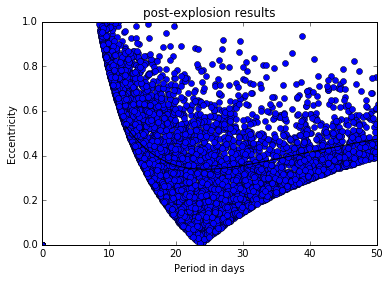

'True'

In [2]:
testing_circular_function_graph(test_sigma=100,test_m1=5.5,test_m2=55,test_ai=133,\
            test_m1f=1.4,seed="Flay",sample_velocity=100,npoints=10000,plot=True,save=False)

In order to fully test post_explosion_params_circular function, a second function was created in addition to testing_circular_function_graph which works by comparing the momentum calculated from that fuction, to a momentum calculated from other known values.

The first momentum function used can be found in the Orbits.ipynb file, and the second was calculated as follows.

First, the angular velocity was calculated.

$\omega = \sqrt{\frac{G M\odot(M_1+M_2)}{(A R\odot)^3}}$    rad/second
        
Then, the velocities of the masses before the kick were calculated.

$V_{1_{initial}} = \frac{M_2}{M_1+M_2}\omega A R\odot$    cm/second

$V_2 = \frac{M_1}{M_1+M_2}\omega A R\odot$     cm/second,-y direction
        
The velocities after the kick were calculated, $V_2$ is unaffected by the kick.

$V_{1x_{final}} = V_k\sin(\phi)\cos(\theta)10^5$

$V_{1y_{final}} = V_{1_{initial}} + V_k\cos(\theta)10^5$

$V_{1z_{final}} = V_k\sin(\phi)\sin(\theta)10^5$
        
The separations from the center of mass in the center of mass frame post-explosion is calculated next.

$R_2 = \frac{A R\odot M_{ns}}{M_{ns}+M_2}$    cm

$R_1 = A R\odot - R_2$    cm
        
After that, components of the angular momentum were calculate using the cross product.

$Momentum_{1y} = -R_1V_{1z_{final}}M_{ns}M\odot$

$Momentum_{1z} = R_1V_{1y_{final}}M_{ns}M\odot$

$Momentum_2 = R_2V_2M_2M\odot$    z direction
        
Finally, the absolute value of the components of the angular momentum were calculated to find the angular momentum.

$Momentum_{calculated} = \sqrt{Momentum_{1y}^2 + Momentum_{1z}^2 + Momentum_2^2}$

Where $V_k$ is the kick velocity, $M_1$ and $M_2$ are the masses of a binary system in solar masses pre-explosion, $M_{ns}$ is the mass of the neutron star post-explosion, A is the semi-major axis, $M\odot$ is the mass of the sun, $R\odot$ is the radius of the sun, and G is the gravitational constant

In [3]:
testing_circular_function_momentum(ai=133, m1=5.5, m2=55, m1f=1.4, test_sigma=100,\
                                   num_sample=1000,seed = "Lela", tolerance=1e-3)

True

A second version of the momentum test and the graph test were needed after the post_explosion_params_general function was created to test that function. These slightly modified functions accept the post_explosion_params_general function with an intial eccentricity of zero. the results they produce are very similar to the original circular tests.

Another function was created to test the post_explosion_params_general function. This function calculates the kick needed to force the eccentric system into a circular one then plugs those results into post_explosion_params_general to make sure the end eccentricity is zero.

First the velocities at perigee and apogee were calculated.

$V_{apogee} = \sqrt{\frac{G(M_1+M_2)(1-e)}{A(1+e)}}$

$V_{perigee} = \sqrt{\frac{G(M_1+M_2)(1+e)}{A(1-e)}}$

Then, the velocities needed post-explosion at perigee and apogee to sustain a circular orbit were calculated.

$V_{circularapogee} = \sqrt{\frac{G(M_{ns}+M_2)}{A(1+e)}}$
        
$V_{circularperigee} = \sqrt{\frac{G(M_{ns}+M_2)}{A(1-e)}}$ 

By taking the difference between the two velocities, the kick needed to produce these circular orbits were found for perigee and apogee.
        
$V_{kickapogee} = |(V_{apogee} - V_{circularapogee})10^5|$
        
$V_{kickperigee} = |(V_{circularperigee} - V_{perigee})10^5|$

Where e is the eccentricity, $M_1$ and $M_2$ are the masses of a binary system in solar masses pre-explosion, $M_{ns}$ is the mass of the neutron star post-explosion, A is the semi-major axis, and G is the gravitational constant.
        
These values were then plugged into the post_explosion_params_general function to see if the kick did indeed produce a circular orbit.

In [ ]:
testing_eccentric_kick(Ai=133, M1=5.5, M2=55, Mns=1.4, num_sample=100, seed = "Guarnaschelli")

An additional test was created for the post_explosions_params_general function that kicks a circular system with mass loss, then reverses that with mass gain back into a circular orbit.

This is done by taking the results from plugging a circular orbit into the post_explosion_params_general function and using them to find the true anomaly at which this kick needs to happen in order to kick that system back into a circular orbit.
        
$true_{anomaly} = \arccos(\frac{semi_{major_i}(1-e_i^2)}{e_iA} - \frac{1}{e_i})$

Where A is the semi-major axis pre-explosion, $semi_{major_i}$ is the semi-major axis post explosion, and e is the eccentricity.

There are four different possible ways to reverse the kick that are dependent on the true anomaly and theta. 1) the inital kick sends the masses into an eccentric orbit in the same initial direction, with a true anomaly between 0 and $\pi$. 2) the inital kick sends the masses into an eccentric orbit in the same initial direction, with a true anomaly between $\pi$ and $2\pi$. 3)the inital kick sends the masses into an eccentric orbit in the opposit direction, with a true anomaly between 0 and $\pi$. 4) the inital kick sends the masses into an eccentricorbit in the opposit direction, with a true anomaly between $\pi$ and $2\pi$.

In [ ]:
testing_inverse_kick(Ai=133, M1=5.5, M2=55, Mns=1.4, test_sigma=1000, num_sample=100,\
                                                    seed="Tamlin",tolerance=1e-4)

A full version of the momentum test was also created to test the post_explosion_params_general in the case of an initial eccentric orbit. The momentum is calculated in a slightly different method from the previous momentum funcitons.

This angular momentum is calculated by first finding the components of the velocity of $M_1$ pre-explosion. 
    
$V_{\theta_i} = \frac{\sqrt{G(M_1+M_2) M\odot R\odot A(1-e^2)}}{separation_i}$
        
$V_{radius_i} = \sqrt{G(M_1+M_2)M\odot \left(\frac{2}{separation_i}-\frac{1}{R\odot A}-\frac{AR\odot(1-e^2)}{separation_i^2}\right)}$
        
Then adding those velocites to the components of the kick to get a velocity in the $\theta$, $\phi$, and radial direction.
    
$V_{radius} = V_{radius_i} + V_k\sin(\theta)\cos(\phi)$

$V_{\theta} = V_{\theta_i} + V_k\cos(\theta)$

$V_{\phi} = V_k\sin(\theta)\sin(\phi)$
        
These velocities are then changed to x and y components.
    
$V_{1x} = V_{radius}$

$V_{1y} = \sqrt{V_{\theta}^2+V_{\phi}^2}$
        
Next the center of mass possition and velocity are calculated, and using those values, the relative velocities and postion are calculated.
        
$R_{cm} = \frac{M_{ns}separation_i}{(M_{ns}+M_2)}$    x direction
        
$V_{cm_x} = \frac{M_{ns}V_{1x}}{M_{ns}+M_2}$     x dirrection
        
$V_{cm_y} = \frac{M_{ns}V_{1y}}{M_{ns}+M_2}$    y dirrection
        
        
$V_{x1}' = V_{1x} - V_{cm_x}$
        
$V_{y1}' = V_{1y} - V_{cm_y}$
        
        
$R_{x1}' = separation_i - R_{cm}$    +x direction
        
$R_{y1}' = 0$ 
        
        
$V_{x2}' = -V_{cm_x}$

$V_{y2}' = -V_{cm_y}$
        
        
$R_{x2}' = 0 - R_{cm}$    -x direction
        
$R_{y2}' = 0$
        
From there, the angular momentum is calculated using the cross-product method, and adding the resulting values.
        
$momentum_{1x} = V_{x1}'M_{ns}M\odot$

$momentum_{1y} = V_{y1}'M_{ns}M\odot$
        
        
$momentum_{2x} = V_{x2}'M_2M\odot$

$momentum_{2y} = V_{y2}'M_2M\odot$
        
        
$angular_1 = R_{x1}'momentum_{1y} - R_{y1}'momentum_{1x}$    z direction
        
$angular_2 = R_{x2}'momentum_{2y} - R_{y2}'momentum_{2x}$    z direction
        
        
$Momentum_{calculated} = angular_1 + angular_2$

Where $V_k$ is the kick velocity, $M_1$ and $M_2$ are the masses of a binary system in solar masses pre-explosion, $M_{ns}$ is the mass of the neutron star post-explosion, e is the eccentricity, A is the semi-major axis, $M\odot$ is the mass of the sun, $R\odot$ is the radius of the sun, G is the gravitational constant, and any variable indicated with a prime is a relative variable.

In [ ]:
testing_momentum_full_eccentric(Ai=133, M1=5.5, M2=55, Mns=1.4, test_sigma=15,num_sample=100,\
                                seed="Lucien",tolerance=1e-4)

## Run tests

This is a file containing a function that runs all the tests in the test_kicks file at once and saves any graphs that are created in the process.